In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv("aircraft.csv")
df.head()

,UPDATED,ENTRY_DATE,EVENT_LCL_DATE,EVENT_LCL_TIME,LOC_CITY_NAME,LOC_STATE_NAME,LOC_CNTRY_NAME,RMK_TEXT,EVENT_TYPE_DESC,FSDO_DESC,...,PAX_INJ_NONE,PAX_INJ_MINOR,PAX_INJ_SERIOUS,PAX_INJ_FATAL,PAX_INJ_UNK,GRND_INJ_NONE,GRND_INJ_MINOR,GRND_INJ_SERIOUS,GRND_INJ_FATAL,GRND_INJ_UNK
0,No,19-FEB-16,19-FEB-16,00:45:00Z,MARSHVILLE,North Carolina,NaN,"AIRCRAFT CRASHED INTO TREES, THE 1 PERSON ON B...",Accident,FAA Charlotte FSDO-68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,19-FEB-16,18-FEB-16,23:55:00Z,TAVERNIER,Florida,NaN,AIRCRAFT ON LANDING WENT OFF THE END OF THE RU...,Incident,FAA Miami FSDO-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,No,19-FEB-16,18-FEB-16,22:14:00Z,TRENTON,New Jersey,NaN,"AIRCRAFT ON FINAL SUSTAINED A BIRD STRIKE, LAN...",Incident,FAA Philadelphia FSDO-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,19-FEB-16,18-FEB-16,17:10:00Z,ASHEVILLE,North Carolina,NaN,"AIRCRAFT ON LANDING, GEAR COLLAPSED, ASHEVILLE...",Incident,FAA Charlotte FSDO-68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,No,19-FEB-16,18-FEB-16,00:26:00Z,TALKEETNA,Alaska,NaN,"AIRCRAFT ON LANDING, NOSE GEAR COLLAPSED, TALK...",Incident,FAA Anchorage FSDO-03,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UPDATED              83 non-null     object 
 1   ENTRY_DATE           83 non-null     object 
 2   EVENT_LCL_DATE       83 non-null     object 
 3   EVENT_LCL_TIME       83 non-null     object 
 4   LOC_CITY_NAME        83 non-null     object 
 5   LOC_STATE_NAME       83 non-null     object 
 6   LOC_CNTRY_NAME       2 non-null      object 
 7   RMK_TEXT             83 non-null     object 
 8   EVENT_TYPE_DESC      83 non-null     object 
 9   FSDO_DESC            81 non-null     object 
 10  REGIST_NBR           83 non-null     object 
 11  FLT_NBR              6 non-null      object 
 12  ACFT_OPRTR           7 non-null      object 
 13  ACFT_MAKE_NAME       78 non-null     object 
 14  ACFT_MODEL_NAME      79 non-null     object 
 15  ACFT_MISSING_FLAG    0 non-null      float

In [185]:
df.isnull().sum()

UPDATED                 0
ENTRY_DATE              0
EVENT_LCL_DATE          0
EVENT_LCL_TIME          0
LOC_CITY_NAME           0
LOC_STATE_NAME          0
LOC_CNTRY_NAME         81
RMK_TEXT                0
EVENT_TYPE_DESC         0
FSDO_DESC               2
REGIST_NBR              0
FLT_NBR                77
ACFT_OPRTR             76
ACFT_MAKE_NAME          5
ACFT_MODEL_NAME         4
ACFT_MISSING_FLAG      83
ACFT_DMG_DESC           9
FLT_ACTIVITY           70
FLT_PHASE               1
FAR_PART               82
MAX_INJ_LVL            64
FATAL_FLAG             75
FLT_CRW_INJ_NONE       19
FLT_CRW_INJ_MINOR      77
FLT_CRW_INJ_SERIOUS    82
FLT_CRW_INJ_FATAL      75
FLT_CRW_INJ_UNK        83
CBN_CRW_INJ_NONE       83
CBN_CRW_INJ_MINOR      83
CBN_CRW_INJ_SERIOUS    83
CBN_CRW_INJ_FATAL      83
CBN_CRW_INJ_UNK        82
PAX_INJ_NONE           66
PAX_INJ_MINOR          82
PAX_INJ_SERIOUS        80
PAX_INJ_FATAL          82
PAX_INJ_UNK            83
GRND_INJ_NONE          83
GRND_INJ_MIN

In [186]:
df['EVENT_LCL_DATE'] = df['EVENT_LCL_DATE'].fillna('').str.strip()
df['EVENT_LCL_TIME'] = df['EVENT_LCL_TIME'].fillna('').str.strip()

df['EVENT_DATETIME'] = pd.to_datetime(
    df['EVENT_LCL_DATE'] + ' ' + df['EVENT_LCL_TIME'],
    format='%d-%b-%y %H:%M:%SZ',
    errors='coerce' 
)

required_cols = [
    'ACFT_MAKE_NAME',     
    'LOC_STATE_NAME',     
    'ACFT_MODEL_NAME',    
    'RMK_TEXT',           
    'FLT_PHASE',        
    'EVENT_TYPE_DESC',   
    'FATAL_FLAG',         
    'ACFT_DMG_DESC'       
]

df_req = df[required_cols].copy()

df_req['FATAL_FLAG'] = df_req['FATAL_FLAG'].fillna("No")

for col in ['FLT_PHASE', 'ACFT_DMG_DESC']:
    mode_val = df_req[col].mode()[0]
    df_req[col] = df_req[col].fillna(mode_val)

print("\nMissing values after filling:")
print(df_req.isnull().sum())

print("\nNumber of observations initially:", len(df_req))

df_req = df_req[df_req['ACFT_MAKE_NAME'].notnull()]

missing_counts = df_req.isnull().sum()
cols_to_drop = missing_counts[missing_counts > 75].index
df_req.drop(columns=cols_to_drop, inplace=True)

print("Number of observations after dropping:", len(df_req))

grouped_counts = df_req.groupby('ACFT_MAKE_NAME').size().sort_values(ascending=False)
print("\nAircraft make frequency:")
print(grouped_counts)

fatal_cases = df_req[df_req['FATAL_FLAG'] == 'Yes']
print("\nFatal cases:")
print(fatal_cases)

df_encoded = pd.get_dummies(df_req, columns=['ACFT_DMG_DESC'], drop_first=True)

print("\nData after one-hot encoding shape:", df_encoded.shape)
print(df_encoded.head())


Missing values after filling:
ACFT_MAKE_NAME     5
LOC_STATE_NAME     0
ACFT_MODEL_NAME    4
RMK_TEXT           0
FLT_PHASE          0
EVENT_TYPE_DESC    0
FATAL_FLAG         0
ACFT_DMG_DESC      0
dtype: int64

Number of observations initially: 83
Number of observations after dropping: 78

Aircraft make frequency:
ACFT_MAKE_NAME
CESSNA                    23
PIPER                     10
BEECH                      9
MOONEY                     4
BOEING                     3
CHAMPION                   2
SOCATA                     2
LANCAIR                    2
BELL                       2
CHRISTEN                   1
AEROSTAR INTERNATIONAL     1
AIRBUS                     1
AERO COMMANDER             1
AERONCA                    1
FAIRCHILD                  1
ENSTROM                    1
EMBRAER                    1
CONSOLIDATED VULTEE        1
GRUMMAN                    1
FLIGHT DESIGN              1
GREAT LAKES                1
GLOBE                      1
MAULE                      1


In [187]:
threshold = 0.98
missing_fraction = df.isnull().mean()
df = df.drop(columns=missing_fraction[missing_fraction > threshold].index)
df.fillna(df.mean(numeric_only=True), inplace=True)

cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

df.fillna(0, inplace=True)  

In [188]:
df.isnull().sum()

UPDATED              0
ENTRY_DATE           0
EVENT_LCL_DATE       0
EVENT_LCL_TIME       0
LOC_CITY_NAME        0
LOC_STATE_NAME       0
LOC_CNTRY_NAME       0
RMK_TEXT             0
EVENT_TYPE_DESC      0
FSDO_DESC            0
REGIST_NBR           0
FLT_NBR              0
ACFT_OPRTR           0
ACFT_MAKE_NAME       0
ACFT_MODEL_NAME      0
ACFT_DMG_DESC        0
FLT_ACTIVITY         0
FLT_PHASE            0
MAX_INJ_LVL          0
FATAL_FLAG           0
FLT_CRW_INJ_NONE     0
FLT_CRW_INJ_MINOR    0
FLT_CRW_INJ_FATAL    0
PAX_INJ_NONE         0
PAX_INJ_SERIOUS      0
EVENT_DATETIME       0
dtype: int64

In [189]:
def minmax_scale(df, cols):
    scaled = df.copy()
    for col in cols:
        col_min = scaled[col].min()
        col_max = scaled[col].max()
        if col_min == col_max: 
            scaled[col] = 0
        else:
            scaled[col] = (scaled[col] - col_min) / (col_max - col_min)
    return scaled.fillna(0)

In [190]:
def standard_scale(df, cols):
    scaled = df.copy()
    for col in cols:
        mean = scaled[col].mean()
        std = scaled[col].std()
        if std == 0:  
            scaled[col] = 0
        else:
            scaled[col] = (scaled[col] - mean) / std
    return scaled.fillna(0)

In [191]:
def run_regression(df, target_col):
    X = df.select_dtypes(include=np.number).drop(columns=[target_col])
    y = df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return r2_score(y_test, y_pred)

In [197]:
df_base = df.copy()

numeric_cols = df_base.select_dtypes(include=np.number).columns
target_col = "FLT_CRW_INJ_NONE"  

mm_scaled = minmax_scale(df_base, numeric_cols)
std_scaled = standard_scale(df_base, numeric_cols)

mm_score = run_regression(mm_scaled, target_col)
std_score = run_regression(std_scaled, target_col)

feature_cols = [col for col in numeric_cols if col != target_col]
df_no_outliers = df_base.copy()

for col in feature_cols:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower) & (df_no_outliers[col] <= upper)]

print("Outliers per column:", outliers_dict)
print("Shape after outlier removal:", df_no_outliers.shape)

mm_scaled_no = minmax_scale(df_no_outliers, numeric_cols)
std_scaled_no = standard_scale(df_no_outliers, numeric_cols)

mm_score_no = run_regression(mm_scaled_no, target_col)
std_score_no = run_regression(std_scaled_no, target_col)

print("\n--- R² Scores ---")
print(f"MinMax (original data): {mm_score:.4f}")
print(f"Standard (original data): {std_score:.4f}")
print(f"MinMax (no outliers): {mm_score_no:.4f}")
print(f"Standard (no outliers): {std_score_no:.4f}")

Outliers per column: {'FLT_CRW_INJ_MINOR': np.int64(6), 'FLT_CRW_INJ_FATAL': np.int64(8), 'PAX_INJ_NONE': np.int64(15), 'PAX_INJ_SERIOUS': np.int64(0)}
Shape after outlier removal: (54, 26)

--- R² Scores ---
MinMax (original data): -0.3347
Standard (original data): -0.3347
MinMax (no outliers): -0.2538
Standard (no outliers): -0.2538


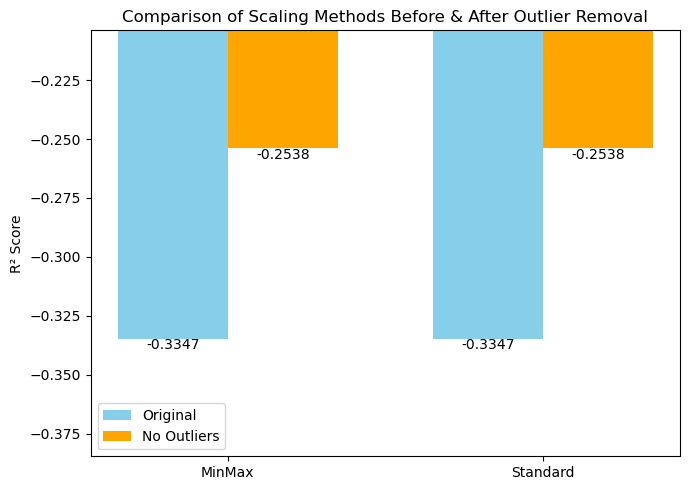

In [198]:
import matplotlib.pyplot as plt
import numpy as np

labels = ["MinMax", "Standard"]
before = [mm_score, std_score]
after = [mm_score_no, std_score_no]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(7,5))
rects1 = ax.bar(x - width/2, before, width, label='Original', color='skyblue')
rects2 = ax.bar(x + width/2, after, width, label='No Outliers', color='orange')

ax.set_ylabel("R² Score")
ax.set_title("Comparison of Scaling Methods Before & After Outlier Removal")
ax.set_xticks(x)
ax.set_xticklabels(labels)

all_scores = before + after
ax.set_ylim(min(all_scores) - 0.05, max(all_scores) + 0.05)

ax.legend()

for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.4f}', 
                xy=(rect.get_x() + rect.get_width()/2, height),
                xytext=(0, 3 if height >= 0 else -10), 
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [195]:
df['EVENT_LCL_DATE'] = df['EVENT_LCL_DATE'].fillna('').str.strip()
df['EVENT_LCL_TIME'] = df['EVENT_LCL_TIME'].fillna('').str.strip()

df['EVENT_DATETIME'] = pd.to_datetime(
    df['EVENT_LCL_DATE'] + ' ' + df['EVENT_LCL_TIME'],
    format='%d-%b-%y %H:%M:%SZ',
    errors='coerce' 
)

required_cols = [
    'ACFT_MAKE_NAME',     
    'LOC_STATE_NAME',     
    'ACFT_MODEL_NAME',    
    'RMK_TEXT',           
    'FLT_PHASE',        
    'EVENT_TYPE_DESC',   
    'FATAL_FLAG',         
    'ACFT_DMG_DESC'       
]

df_req = df[required_cols].copy()

df_req['FATAL_FLAG'] = df_req['FATAL_FLAG'].fillna("No")

for col in ['FLT_PHASE', 'ACFT_DMG_DESC']:
    mode_val = df_req[col].mode()[0]
    df_req[col] = df_req[col].fillna(mode_val)

print("\nMissing values after filling:")
print(df_req.isnull().sum())

print("\nNumber of observations initially:", len(df_req))

df_req = df_req[df_req['ACFT_MAKE_NAME'].notnull()]

missing_counts = df_req.isnull().sum()
cols_to_drop = missing_counts[missing_counts > 75].index
df_req.drop(columns=cols_to_drop, inplace=True)

print("Number of observations after dropping:", len(df_req))

grouped_counts = df_req.groupby('ACFT_MAKE_NAME').size().sort_values(ascending=False)
print("\nAircraft make frequency:")
print(grouped_counts)

fatal_cases = df_req[df_req['FATAL_FLAG'] == 'Yes']
print("\nFatal cases:")
print(fatal_cases)

df_encoded = pd.get_dummies(df_req, columns=['ACFT_DMG_DESC'], drop_first=True)

print("\nData after one-hot encoding shape:", df_encoded.shape)
print(df_encoded.head())


Missing values after filling:
ACFT_MAKE_NAME     0
LOC_STATE_NAME     0
ACFT_MODEL_NAME    0
RMK_TEXT           0
FLT_PHASE          0
EVENT_TYPE_DESC    0
FATAL_FLAG         0
ACFT_DMG_DESC      0
dtype: int64

Number of observations initially: 83
Number of observations after dropping: 83

Aircraft make frequency:
ACFT_MAKE_NAME
CESSNA                    28
PIPER                     10
BEECH                      9
MOONEY                     4
BOEING                     3
CHAMPION                   2
SOCATA                     2
LANCAIR                    2
BELL                       2
CHRISTEN                   1
AEROSTAR INTERNATIONAL     1
AIRBUS                     1
AERO COMMANDER             1
AERONCA                    1
FAIRCHILD                  1
ENSTROM                    1
EMBRAER                    1
CONSOLIDATED VULTEE        1
GRUMMAN                    1
FLIGHT DESIGN              1
GREAT LAKES                1
GLOBE                      1
MAULE                      1
